In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | fukuma
Processing Record 2 of Set 13 | arraial do cabo
Processing Record 3 of Set 13 | atuona
Processing Record 4 of Set 13 | kapaa
Processing Record 5 of Set 13 | tuktoyaktuk
Processing Record 6 of Set 13 | yellowknife
Processing Record 7 of Set 13 | busselton
Processing Record 8 of Set 13 | vanimo
Processing Record 9 of Set 13 | koboldo
City not found. Skipping...
Processing Record 10 of Set 13 | dilla
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | tukrah
Processing Record 13 of Set 13 | cape town
Processing Record 14 of Set 13 | srednekolymsk
Processing Record 15 of Set 13 | rikitea
Processing Record 16 of Set 13 | ginda
Processing Record 17 of Set 13 | saldanha
Processing Record 18 of Set 13 | punta arenas
Processing Record 19 of Set 13 | mahebourg
Processing Record 20 of Set 13 | hobart
Processing Record 21 of Set 13 | castro
Processing Record 22 of Set 13 | mataura
Processing Record 23 of Set 13 | vaini
Processing Record 

Processing Record 32 of Set 16 | matamoros
Processing Record 33 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 34 of Set 16 | howell
Processing Record 35 of Set 16 | calama
Processing Record 36 of Set 16 | lar gerd
City not found. Skipping...
Processing Record 37 of Set 16 | havre-saint-pierre
Processing Record 38 of Set 16 | mehamn
Processing Record 39 of Set 16 | tezu
Processing Record 40 of Set 16 | praia
Processing Record 41 of Set 16 | geraldton
Processing Record 42 of Set 16 | cheremkhovo
Processing Record 43 of Set 16 | mandera
Processing Record 44 of Set 16 | kudahuvadhoo
Processing Record 45 of Set 16 | sakakah
Processing Record 46 of Set 16 | lorengau
Processing Record 47 of Set 16 | saint-pierre
Processing Record 48 of Set 16 | aflu
City not found. Skipping...
Processing Record 49 of Set 16 | ponta do sol
Processing Record 50 of Set 16 | debre tabor
Processing Record 1 of Set 17 | anjozorobe
Processing Record 2 of Set 17 | rapar
Processing Record 3 of S

Processing Record 17 of Set 20 | narsaq
Processing Record 18 of Set 20 | bilibino
Processing Record 19 of Set 20 | ciudad bolivar
Processing Record 20 of Set 20 | casino
Processing Record 21 of Set 20 | san cristobal
Processing Record 22 of Set 20 | ugoofaaru
Processing Record 23 of Set 20 | qingdao
Processing Record 24 of Set 20 | bretzfeld
Processing Record 25 of Set 20 | fare
Processing Record 26 of Set 20 | vestmannaeyjar
Processing Record 27 of Set 20 | ponta pora
Processing Record 28 of Set 20 | hofn
Processing Record 29 of Set 20 | cagayan de tawi-tawi
City not found. Skipping...
Processing Record 30 of Set 20 | marcona
City not found. Skipping...
Processing Record 31 of Set 20 | fortuna
Processing Record 32 of Set 20 | salalah
Processing Record 33 of Set 20 | opunake
Processing Record 34 of Set 20 | alibag
Processing Record 35 of Set 20 | bockenem
Processing Record 36 of Set 20 | vila franca do campo
Processing Record 37 of Set 20 | ilo
Processing Record 38 of Set 20 | half moo

Processing Record 3 of Set 24 | havelock
Processing Record 4 of Set 24 | sembe
Processing Record 5 of Set 24 | marawi
Processing Record 6 of Set 24 | fallon
Processing Record 7 of Set 24 | francia
Processing Record 8 of Set 24 | ahwa
Processing Record 9 of Set 24 | kyra
Processing Record 10 of Set 24 | sandpoint
Processing Record 11 of Set 24 | methoni
Processing Record 12 of Set 24 | port pirie
Processing Record 13 of Set 24 | ixtapa
Processing Record 14 of Set 24 | hailar
Processing Record 15 of Set 24 | griffith
Processing Record 16 of Set 24 | oranjestad
Processing Record 17 of Set 24 | tabiauea
City not found. Skipping...
Processing Record 18 of Set 24 | lyuban
Processing Record 19 of Set 24 | kiruna
Processing Record 20 of Set 24 | bartica
Processing Record 21 of Set 24 | launceston
Processing Record 22 of Set 24 | laerdalsoyri
Processing Record 23 of Set 24 | paita
Processing Record 24 of Set 24 | arona
Processing Record 25 of Set 24 | kitob
Processing Record 26 of Set 24 | band

In [14]:
len(city_data)

566

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fukuma,33.7667,130.4667,75.20,87,32,7.63,JP,2021-09-22 20:44:28
1,Arraial Do Cabo,-22.9661,-42.0278,71.46,56,20,11.50,BR,2021-09-22 20:39:31
2,Atuona,-9.8000,-139.0333,77.79,73,26,20.96,PF,2021-09-22 20:44:28
3,Kapaa,22.0752,-159.3190,84.18,70,90,4.00,US,2021-09-22 20:40:43
4,Tuktoyaktuk,69.4541,-133.0374,37.40,65,75,19.57,CA,2021-09-22 20:44:29
5,Yellowknife,62.4560,-114.3525,50.52,81,75,9.22,CA,2021-09-22 20:44:29
6,Busselton,-33.6500,115.3333,48.04,92,0,9.80,AU,2021-09-22 20:44:29
7,Vanimo,-2.6741,141.3028,76.77,91,97,4.97,PG,2021-09-22 20:44:30
8,Dilla,6.4100,38.3100,63.59,85,97,4.56,ET,2021-09-22 20:44:30
9,Ushuaia,-54.8000,-68.3000,49.66,66,40,21.85,AR,2021-09-22 20:40:36


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fukuma,JP,2021-09-22 20:44:28,33.7667,130.4667,75.20,87,32,7.63
1,Arraial Do Cabo,BR,2021-09-22 20:39:31,-22.9661,-42.0278,71.46,56,20,11.50
2,Atuona,PF,2021-09-22 20:44:28,-9.8000,-139.0333,77.79,73,26,20.96
3,Kapaa,US,2021-09-22 20:40:43,22.0752,-159.3190,84.18,70,90,4.00
4,Tuktoyaktuk,CA,2021-09-22 20:44:29,69.4541,-133.0374,37.40,65,75,19.57
5,Yellowknife,CA,2021-09-22 20:44:29,62.4560,-114.3525,50.52,81,75,9.22
6,Busselton,AU,2021-09-22 20:44:29,-33.6500,115.3333,48.04,92,0,9.80
7,Vanimo,PG,2021-09-22 20:44:30,-2.6741,141.3028,76.77,91,97,4.97
8,Dilla,ET,2021-09-22 20:44:30,6.4100,38.3100,63.59,85,97,4.56
9,Ushuaia,AR,2021-09-22 20:40:36,-54.8000,-68.3000,49.66,66,40,21.85


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

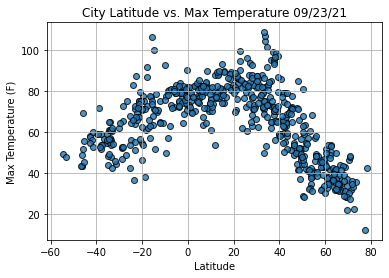

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

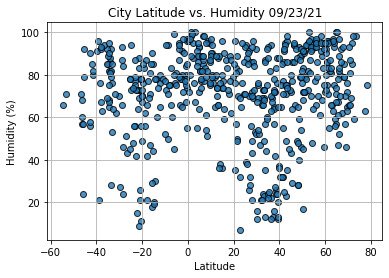

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

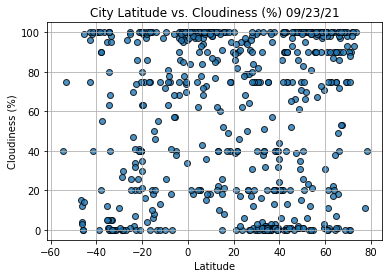

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

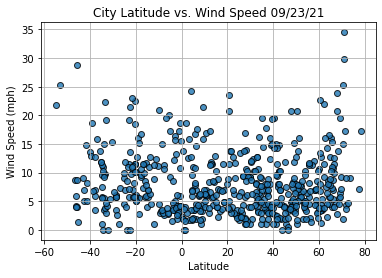

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

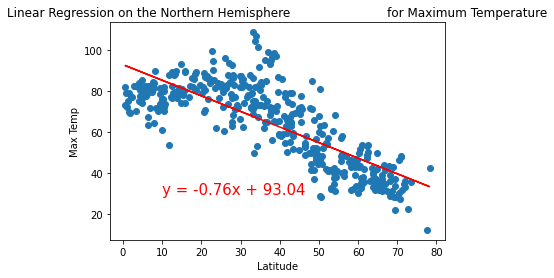

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,30))

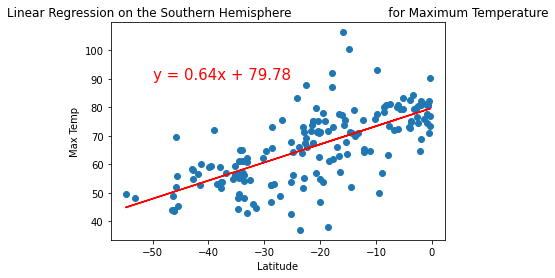

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

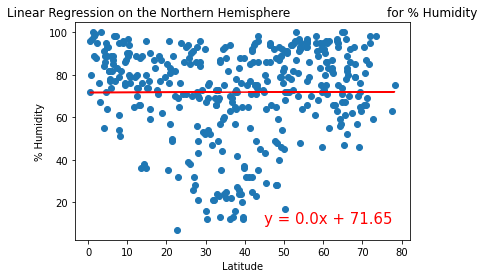

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

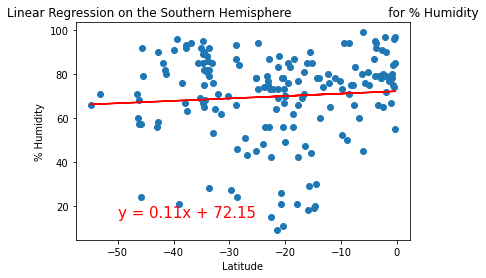

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

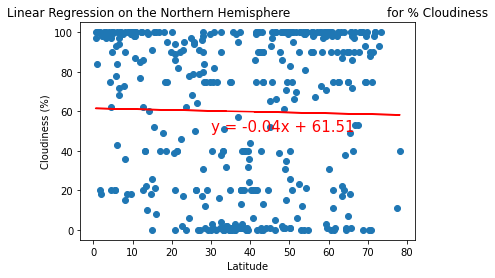

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness (%)',(30,50))

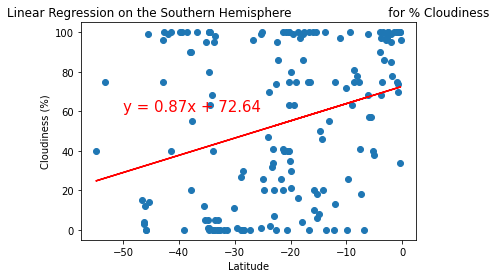

In [45]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', 'Cloudiness (%)',(-50,60))

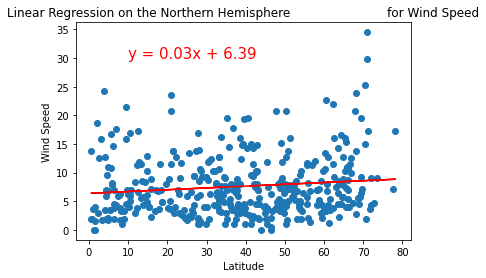

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,30))

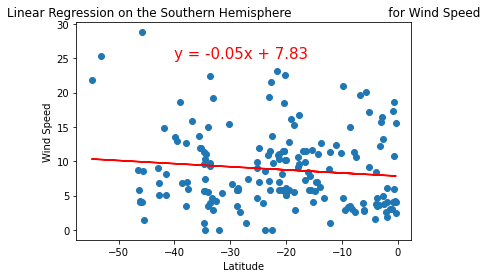

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,25))